# Question 1

## 1D One

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy as sp 
from scipy import stats


data = np.linspace(1,100,40)
y_eq = 5 * data + 15
#array = np.array(data)
noise = np.random.normal(0,5,len(data))

y_eq_noise = y_eq + noise

result = sp.stats.linregress(data,y_eq_noise)

print(result)

LinregressResult(slope=5.0350070410938, intercept=13.816417164017338, rvalue=0.9996003929456041, pvalue=1.8126215036181853e-60, stderr=0.02309776963618965, intercept_stderr=1.348578390576503)


In [53]:
pip install --upgrade scipy

     |████████████████████████████████| 33.0 MB 30.4 MB/s eta 0:00:01   |▌                               | 532 kB 3.3 MB/s eta 0:00:10     |████████▌                       | 8.8 MB 3.3 MB/s eta 0:00:08     |███████████▊                    | 12.1 MB 798 kB/s eta 0:00:27     |████████████▌                   | 12.9 MB 798 kB/s eta 0:00:26     |██████████████▉                 | 15.2 MB 798 kB/s eta 0:00:23
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
Note: you may need to restart the kernel to use updated packages.


Text(0, 0.5, 'Y')

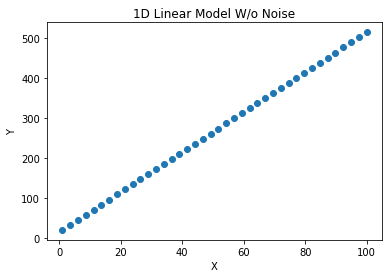

In [43]:
plt.scatter(data, y_eq)
plt.title('1D Linear Model W/o Noise')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

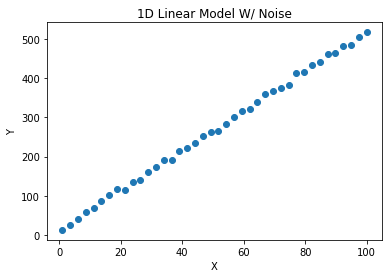

In [44]:
plt.scatter(data, y_eq_noise)
plt.title('1D Linear Model W/ Noise')
plt.xlabel('X')
plt.ylabel('Y')

# 2D 

In [11]:
from scipy.optimize import curve_fit

data = np.random.uniform(1,100,40)
data1 = np.random.uniform(1,100,40)
y_eq = 5 * data + 15 + 7 * data1

noise = np.random.normal(0,5,len(y_eq))

y_eq_noise = y_eq + noise

def func(DATA, a, b, c):
    data, data1 = DATA
    return a*data + b*data1 + c

DATA = [data,data1]
params, covar = sp.optimize.curve_fit(func, DATA, y_eq_noise)

error = np.sqrt(np.diag(covar))

print('a:', params[0])
print('error:', error[0])
print('b:', params[1])
print('error:', error[1])
print('c:', params[2])
print('error:', error[2])


y = params[0]*data + params[1]*data1 + params[2]

chi_sq = stats.chisquare(y_eq_noise, y)
print('Chi square:', chi_sq)

a: 4.99954959600798
error: 0.02527773723516775
b: 7.026957833278151
error: 0.027592462101868852
c: 11.468138829475347
error: 2.203498374173178
Chi square: Power_divergenceResult(statistic=1.6385843879015771, pvalue=1.0)


# PROBLEM 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy as sp 
from scipy import stats


data = np.linspace(1,100,40)
y_eq = 5 * data + 15
#array = np.array(data)
noise = np.random.normal(2,5,len(data))

y_eq_noise = y_eq + noise

result = sp.stats.linregress(data,y_eq_noise)

print(result)

LinregressResult(slope=4.999856871599995, intercept=15.221993110170985, rvalue=0.9994458279340651, pvalue=9.035480852809418e-58, stderr=0.027013673767718755, intercept_stderr=1.577211015047537)


Text(0, 0.5, 'Y')

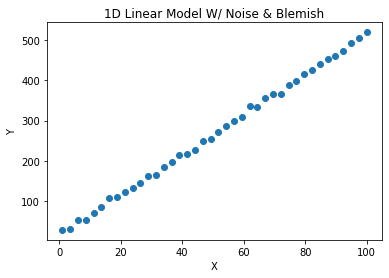

In [14]:
plt.scatter(data, y_eq_noise)
plt.title('1D Linear Model W/ Noise & Blemish')
plt.xlabel('X')
plt.ylabel('Y')

LinregressResult(slope=4.741454492646282, intercept=18.707255106873447, rvalue=0.9794947878909858, pvalue=5.327779881593565e-70, stderr=0.09851576492479218, intercept_stderr=5.730451275305347)


Text(0, 0.5, 'Y')

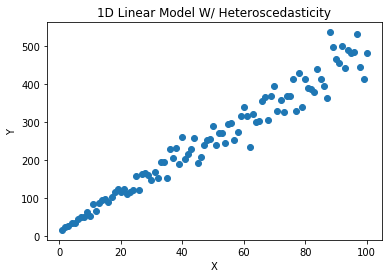

In [17]:
data = np.linspace(1,100,100)
y_eq = 5 * data + 15
#array = np.array(data)
noise = np.random.normal(0,5,len(data))


hetero_noise = np.array([])
n = 1

while n<=100:
    hetero = np.random.normal(0, (n/2)+3, 1)
    hetero_noise = np.append(hetero_noise, hetero)
    n = n + 1


y_eq_noise = y_eq + noise
y_eq_hetero_noise = y_eq + hetero_noise


result = sp.stats.linregress(data,y_eq_hetero_noise)

print(result)

plt.scatter(data, y_eq_hetero_noise)
plt.title('1D Linear Model W/ Heteroscedasticity')
plt.xlabel('X')
plt.ylabel('Y')

# Problem 3

/Users/kevinmoposita/opt/anaconda3/lib/python3.7/site-packages/numpy/polynomial/legendre.py:1410: RankWarning: The fit may be poorly conditioned
  return pu._fit(legvander, x, y, deg, rcond, full, w)


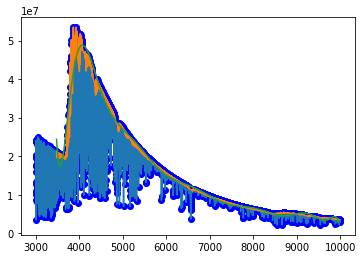

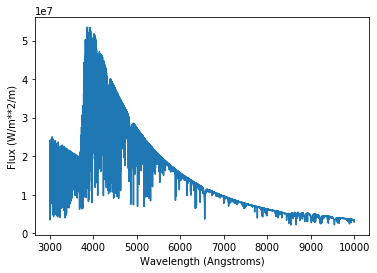

NameError: name 'sigma_clip' is not defined

In [19]:
#Here's the setup
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy.polynomial.legendre as nppl
#The data
data = np.loadtxt('Vega.txt', unpack = True)

flux = data[1,:]
wave = data[0,:]
#Okay so basically we want to set up our rolling median and
#standard deviation here, it needs to roll to adjust to the
#craziness of our dataset
d = {'Wavelength' : wave, 'Intensity' : flux}

i_df = pd.DataFrame(d)
i_df['Std'] = i_df['Intensity'].rolling(50).std()
i_df['Median'] = i_df['Intensity'].rolling(50).median()
c_df = i_df.copy()

#Time for the function

def regression(df):
    x = np.arange(df.size)
    m,b,r,p,e = linregress(x,df)
    #liny = m * df['Wavelength'] + b
    yval = m * x[-1] + b
    return yval

#And it's time to initialize

a = 0.5
b = 1.0
iters = 6

for i in range(0,iters):
    upper = c_df['Median'] + a * c_df['Std']
    lower = c_df['Median'] - b * c_df['Std']

    mask = c_df['Intensity'] < upper
    mask = c_df['Intensity'] > lower

    c_df = c_df[mask]

    c_df['Std'] = c_df['Intensity'].rolling(50).std()
    c_df['Median'] = c_df['Intensity'].rolling(50).agg(regression)

#Now it's finally time for the Legendre fit baby

coefs = nppl.legfit(c_df['Wavelength'], c_df['Intensity'], 15)
fit = nppl.legval(c_df['Wavelength'], coefs)

plt.plot(wave, flux, 'bo')
plt.plot(i_df['Wavelength'], i_df['Intensity'])
plt.plot(c_df['Wavelength'], c_df['Intensity'])
plt.plot(c_df['Wavelength'], fit)
plt.show()

plt.plot(wave,flux)
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (W/m**2/m)')
plt.show()

clipped = sigma_clip(flux, sigma_lower =2, sigma_upper = 4, iters=100)

plt.plot(wave, clipped)
plt.show()
    
#Legendre Spectral Fitting.py #Legendre Spectral Fitting.py #Legendre Spectral Fitting.py


#legendrespex.py #legendrespex.py #legendrespex.py #legendrespex.py #legendrespex.py

#Here's the setup
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy.polynomial.legendre as nppl
#The data
data = np.loadtxt('vegaspex.txt', unpack = True)

flux = data[1,:]
wave = data[0,:]
#Okay so basically we want to set up our rolling median and
#standard deviation here, it needs to roll to adjust to the
#craziness of our dataset
d = {'Wavelength' : wave, 'Intensity' : flux}

i_df = pd.DataFrame(d)
i_df['Std'] = i_df['Intensity'].rolling(50).std()
i_df['Median'] = i_df['Intensity'].rolling(50).median()
c_df = i_df.copy()

#Time for the function

def regression(df):
    x = np.arange(df.size)
    m,b,r,p,e = linregress(x,df)
    #liny = m * df['Wavelength'] + b
    yval = m * x[-1] + b
    return yval

#And it's time to initialize

a = 0.5
b = 1.0
iters = 6

for i in range(0,iters):
    upper = c_df['Median'] + a * c_df['Std']
    lower = c_df['Median'] - b * c_df['Std']

    mask = c_df['Intensity'] < upper
    mask = c_df['Intensity'] > lower

    c_df = c_df[mask]

    c_df['Std'] = c_df['Intensity'].rolling(50).std()
    c_df['Median'] = c_df['Intensity'].rolling(50).agg(regression)

#Now it's finally time for the Legendre fit baby

coefs = nppl.legfit(c_df['Wavelength'], c_df['Intensity'], 15)
fit = nppl.legval(c_df['Wavelength'], coefs)
cs = {'fontname':'Times New Roman'}
plt.plot(wave, flux)
plt.plot(i_df['Wavelength'], i_df['Intensity'], color='#ccedfd')
plt.plot(c_df['Wavelength'], c_df['Intensity'], color='#ff69b4')
plt.plot(c_df['Wavelength'], fit, color='#800080')
plt.title('Absorption Spectrum of Vega, Sigma-Clipped', **cs)
plt.xlabel('Wavelength ($\AA$)',**cs)
plt.ylabel('Flux (W/m^2/m)', **cs)
plt.show()

plt.plot(wave,flux, color='#ff69b4')
plt.title('Absorption Spectrum of Vega', **cs)
plt.xlabel('Wavelength ($\AA$)', **cs)
plt.ylabel('Flux (W/m^2/m)', **cs)
plt.show()

plt.plot(wave, clipped)
plt.show()

# Problem 3

Text(0, 0.5, 'Number of Deaths')

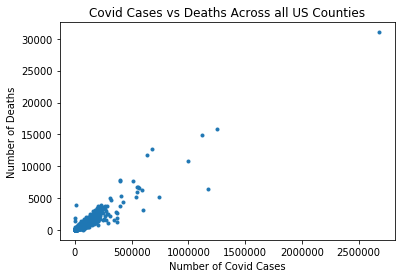

In [30]:
covid_cases = np.loadtxt('covid_confirmed.txt')
covid_death = np.loadtxt('covid_deaths.txt')

plt.figure(1)
plt.plot(covid_cases,covid_death, '.')
plt.title('Covid Cases vs Deaths Across all US Counties')
plt.xlabel('Number of Covid Cases')
plt.ylabel('Number of Deaths')

In [32]:
result_covid = sp.stats.linregress(covid_cases,covid_death)
print(result_covid)

LinregressResult(slope=0.011149627322275356, intercept=19.53433125159114, rvalue=0.9511006845002101, pvalue=0.0, stderr=6.412063697473284e-05, intercept_stderr=5.491107819442837)


Text(0, 0.5, 'Number of Deaths')

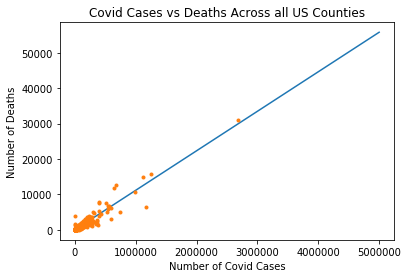

In [36]:
x_covid = np.linspace(0,5000000,50)

y_covid = x_covid * 0.011149627322275356 + 19.53433125159114

plt.figure(1)
plt.plot(x_covid, y_covid)
plt.plot(covid_cases,covid_death, '.')
plt.title('Covid Cases vs Deaths Across all US Counties')
plt.xlabel('Number of Covid Cases')
plt.ylabel('Number of Deaths')

# multicollinearity